In [135]:
import numpy as np 
import pandas as pd 
import matplotlib
import re

data=pd.read_csv('titanic-passengers.csv',sep=';')

In [10]:
display(data)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S


In [11]:
data.head(5)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S


# DATA INFORMATION

In [12]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    object 
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 83.7+ KB


NULL VALUES

In [13]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [15]:
data_Age_mean=data['Age'].mean()
data['Age'].fillna(data_Age_mean,inplace=True)

In [16]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [22]:
data['Cabin'].value_counts().sort_values()

D47            1
A26            1
C90            1
D48            1
D19            1
              ..
E101           3
C22 C26        3
C23 C25 C27    4
B96 B98        4
G6             4
Name: Cabin, Length: 147, dtype: int64

In [24]:
data['Cabin'].fillna('G6',inplace=True)

In [25]:
data.isnull().sum()

PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       2
dtype: int64

In [26]:
data['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [27]:
data['Embarked'].fillna('S',inplace=True)

In [28]:
data.isnull().sum()


PassengerId    0
Survived       0
Pclass         0
Name           0
Sex            0
Age            0
SibSp          0
Parch          0
Ticket         0
Fare           0
Cabin          0
Embarked       0
dtype: int64

# Taking care of Categorical Features

In [147]:
data['Sex'].replace(['male', 'female'],
                        [0, 1], inplace=True)

In [148]:
data['Survived'].replace(['No', 'Yes'],
                        [0, 1], inplace=True)

In [42]:
data.describe()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,0.352413,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,0.477990,13.002015,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,0.000000,22.000000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,0.000000,29.699118,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,1.000000,35.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200


# data visualisation

In [34]:
import seaborn as sns
import matplotlib.pyplot as plt


<AxesSubplot:>

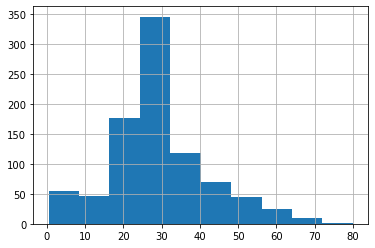

In [51]:
data['Age'].hist()


Text(0.5, 1.0, 'Density plot')

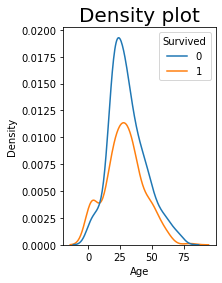

In [167]:
plt.subplot(1,2,2)
dp_ax = sns.kdeplot(x = 'Age', hue = 'Survived', data = data)
dp_ax.set_title('Density plot', fontsize = 20)

ValueError: Could not interpret input 'cabin_bin'

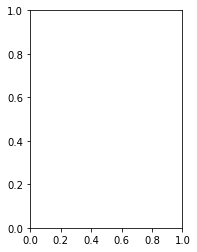

In [170]:
plt.subplot(1,2,1)
bp_ax = sns.boxplot(x = "Survived",y="cabin_bin", data = data)
bp_ax.set_title('Box plot', fontsize = 20)

C:\Users\TRETEC\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)


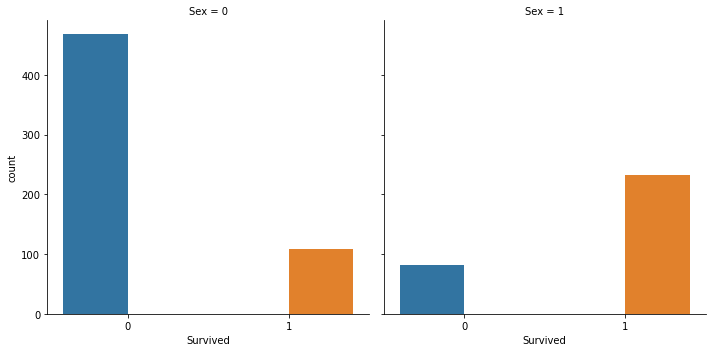

In [69]:
sns.factorplot(x='Survived',col='Sex',kind='count',hue='Survived',data=data)

More number of male passengers have died than female ones.

<AxesSubplot:xlabel='Survived', ylabel='count'>

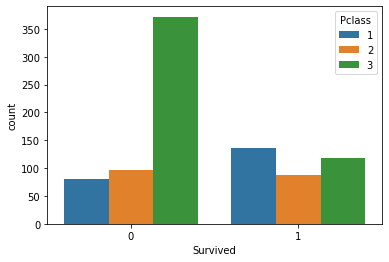

In [78]:
sns.countplot(x='Survived',hue='Pclass',data=data)

The graph tells us that Pclass 3 were more likely to be survived. It was meant for the richer people while Pclass 1 were the more likely victims which was relatively cheaper than class 3.

In [81]:

def plot_correlation_map( df ):

    corr = df.corr()

    s , ax = plt.subplots( figsize =( 12 , 10 ) )

    cmap = sns.diverging_palette( 220 , 10 , as_cmap = True )

    s = sns.heatmap(

        corr, 

        cmap = cmap,

        square=True, 

        cbar_kws={ 'shrink' : .9 }, 

        ax=ax, 

        annot = True, 

        annot_kws = { 'fontsize' : 12 }

        )

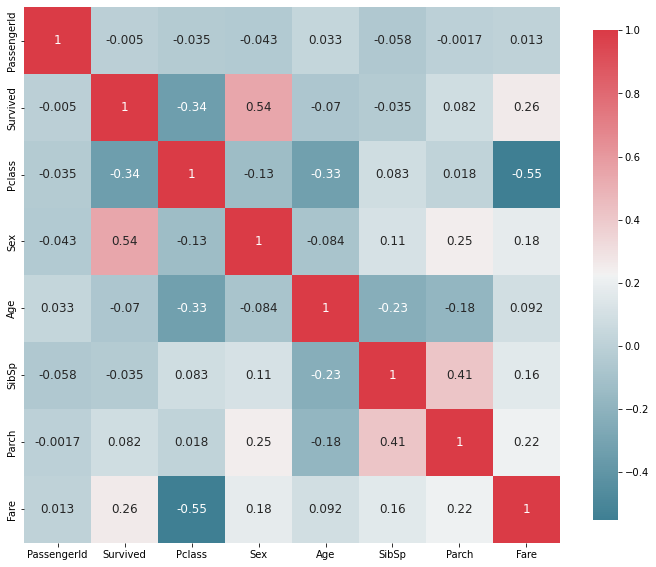

In [82]:
plot_correlation_map(data)

In [110]:
data.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [115]:
data.groupby('Pclass').count()

,PassengerId,Survived,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Pclass,,,,,,,,,,,
1,216,216,216,216,216,216,216,216,216,216,216
2,184,184,184,184,184,184,184,184,184,184,184
3,491,491,491,491,491,491,491,491,491,491,491


In [129]:
data[(data['Pclass']==3) & (data['Survived']==1)].count()


PassengerId    119
Survived       119
Pclass         119
Name           119
Sex            119
Age            119
SibSp          119
Parch          119
Ticket         119
Fare           119
Cabin          119
Embarked       119
dtype: int64

In [125]:
data[(data['Pclass']==1) & (data['Survived']==0)].count()

PassengerId    80
Survived       80
Pclass         80
Name           80
Sex            80
Age            80
SibSp          80
Parch          80
Ticket         80
Fare           80
Cabin          80
Embarked       80
dtype: int64

In [128]:
data.groupby('Pclass')['Survived'].sum()

Pclass
1    136
2     87
3    119
Name: Survived, dtype: int64

In [130]:
data.groupby('Pclass')['Survived'].mean()

Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

In [131]:
 for data in combine:
    data['Title'] = data.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

pd.crosstab(data['Title'], data['Sex'])

NameError: name 'combine' is not defined

In [132]:
data


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,343,0,2,"Collander, Mr. Erik Gustaf",0,28.000000,0,0,248740,13.0000,G6,S
1,76,0,3,"Moen, Mr. Sigurd Hansen",0,25.000000,0,0,348123,7.6500,F G73,S
2,641,0,3,"Jensen, Mr. Hans Peder",0,20.000000,0,0,350050,7.8542,G6,S
3,568,0,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",1,29.000000,0,4,349909,21.0750,G6,S
4,672,0,1,"Davidson, Mr. Thornton",0,31.000000,1,0,F.C. 12750,52.0000,B71,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",1,14.000000,1,0,237736,30.0708,G6,C
887,61,0,3,"Sirayanian, Mr. Orsen",0,22.000000,0,0,2669,7.2292,G6,C
888,535,0,3,"Cacic, Miss. Marija",1,30.000000,0,0,315084,8.6625,G6,S
889,102,0,3,"Petroff, Mr. Pastcho (""Pentcho"")",0,29.699118,0,0,349215,7.8958,G6,S


In [136]:
def get_title(name):

    title_search = re.search(' ([A-Za-z]+)\.', name)
    
    if title_search:
        return title_search.group(1)
    return ""

In [137]:
data["Title"] = data["Name"].apply(get_title)

In [138]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [139]:
Title_Dictionary = {
                        "Capt":       "Officer",
                        "Col":        "Officer",
                        "Major":      "Officer",
                        "Jonkheer":   "Royal",
                        "Don":        "Royal",
                        "Sir" :       "Royal",
                        "Dr":         "Officer",
                        "Rev":        "Officer",
                        "Countess":   "Royal",
                        "Dona":       "Royal",
                        "Mme":        "Mrs",
                        "Mlle":       "Miss",
                        "Ms":         "Mrs",
                        "Mr" :        "Mr",
                        "Mrs" :       "Mrs",
                        "Miss" :      "Miss",
                        "Master" :    "Master",
                        "Lady" :      "Royal"

                        }

In [141]:
def titlemap(x):
    return Title_Dictionary[x]


data["Title"] = data["Title"].apply(titlemap)

In [142]:
data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,343,No,2,"Collander, Mr. Erik Gustaf",male,28.0,0,0,248740,13.0000,NaN,S,Mr
1,76,No,3,"Moen, Mr. Sigurd Hansen",male,25.0,0,0,348123,7.6500,F G73,S,Mr
2,641,No,3,"Jensen, Mr. Hans Peder",male,20.0,0,0,350050,7.8542,NaN,S,Mr
3,568,No,3,"Palsson, Mrs. Nils (Alma Cornelia Berglund)",female,29.0,0,4,349909,21.0750,NaN,S,Mrs
4,672,No,1,"Davidson, Mr. Thornton",male,31.0,1,0,F.C. 12750,52.0000,B71,S,Mr
...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,10,Yes,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,Mrs
887,61,No,3,"Sirayanian, Mr. Orsen",male,22.0,0,0,2669,7.2292,NaN,C,Mr
888,535,No,3,"Cacic, Miss. Marija",female,30.0,0,0,315084,8.6625,NaN,S,Miss
889,102,No,3,"Petroff, Mr. Pastcho (""Pentcho"")",male,NaN,0,0,349215,7.8958,NaN,S,Mr


In [157]:
data.groupby("Title").count()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
Title,,,,,,,,,,,,
Master,40,40,40,40,40,36,40,40,40,40,7,40
Miss,184,184,184,184,184,148,184,184,184,184,49,183
Mr,517,517,517,517,517,398,517,517,517,517,93,517
Mrs,127,127,127,127,127,110,127,127,127,127,45,126
Officer,18,18,18,18,18,17,18,18,18,18,7,18
Royal,5,5,5,5,5,5,5,5,5,5,3,5


<AxesSubplot:>

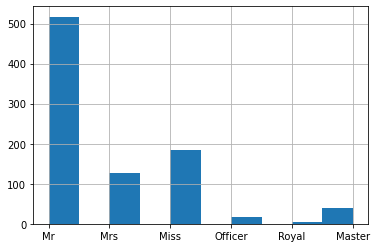

In [162]:
data['Title'].hist()

In [165]:
data.groupby("Title")['Survived'].sum()

Title
Master      23
Miss       129
Mr          81
Mrs        101
Officer      5
Royal        3
Name: Survived, dtype: int64